# Overview

In [40]:
from models import convolutional_model
from utils import readfile, extract_features, union_notes, export_to_midi
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# filepath = './data/Symphony_No_5_Beethoven.mp3'
# filepath = './data/Vremena_goda_Leto_Antonio_Vivaldi.mp3'
filepath = './data/Oginsky_Polonaise_Farewell_of_the_Homeland.mp3'

In [42]:
signal = readfile(filepath)

/home/pandrii000/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [43]:
model = convolutional_model()
model.load_weights('./convolutional_model/weights.h5')

In [44]:
features = extract_features(signal)

In [45]:
# convolution model requires features in dimension (len(features), 512, 1)
features = np.reshape(features, (len(features), 512, 1))

In [46]:
_prediction = model.predict_on_batch(features)

In [47]:
threshold = 0.205

In [48]:
prediction = _prediction.copy()
prediction[prediction >= threshold] = 1
prediction[prediction  < threshold] = 0

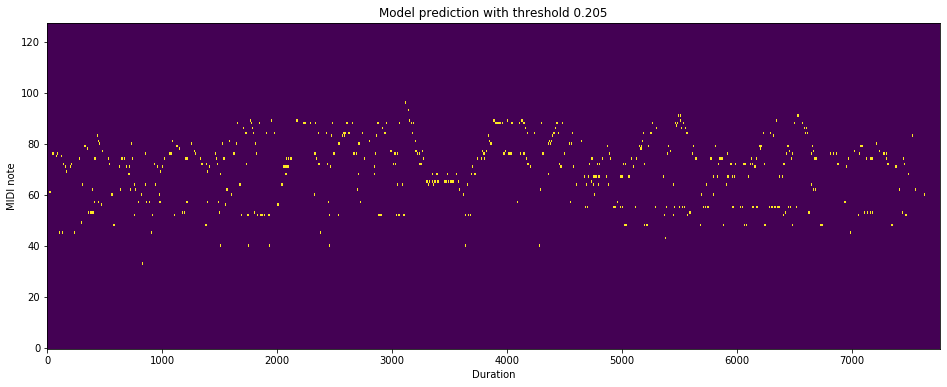

In [49]:
fig = plt.figure(figsize=(16, 6))
ax = fig.subplots(1)
ax.imshow(prediction.transpose())
ax.set_aspect('auto')
ax.set_title('Model prediction with threshold {}'.format(threshold))
ax.set_xlabel('Duration')
ax.set_ylabel('MIDI note')
plt.gca().invert_yaxis()

In [50]:
union_notes(prediction)

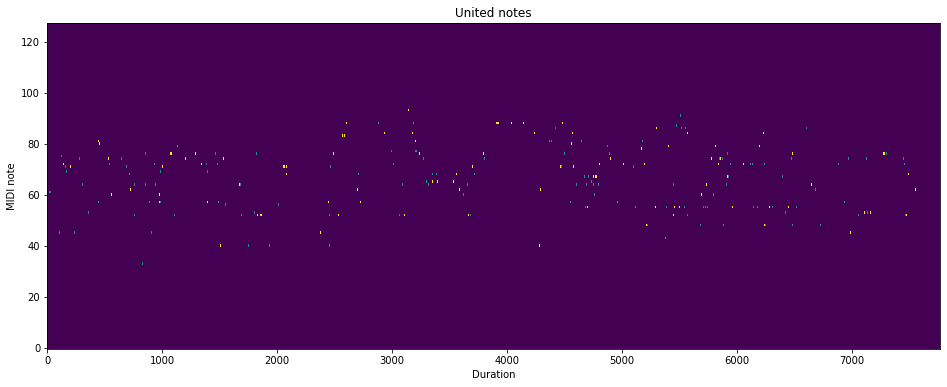

In [51]:
fig = plt.figure(figsize=(16, 6))
ax = fig.subplots(1)
ax.imshow(prediction.transpose())
ax.set_aspect('auto')
ax.set_title('United notes'.format(threshold))
ax.set_xlabel('Duration')
ax.set_ylabel('MIDI note')
plt.gca().invert_yaxis()

In [52]:
output_path = filepath + '.restored.midi'
export_to_midi(prediction, output_path)